In [ ]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from glob import glob
import os
import json 
from tqdm import tqdm

In [ ]:
image_list=glob('../../data/IGNITE/images/pdl1/nuclei/*.png')
label=json.load(open('../../data/IGNITE/annotations/pdl1/pdl1/pdl1_annotations.json'))


In [ ]:

annotations_label=[]
label_category=[{'id': 1, 'name': 'pd-l1 negative tumor cell'},
  {'id': 2, 'name': 'pd-l1 positive tumor cell'},
  {'id': 3, 'name': 'non-tumor cell'}]
for i in range(len(label['images'])):
    annotations_label.append({'image':label['images'][i],
                              'annotations':[]})

for i in tqdm(range(len(label['annotations']))):
    image_id=label['annotations'][i]['image_id']
    annotations_label[image_id]['annotations'].append({'category_id':label['annotations'][i]['category_id'],
                                                        'bbox':label['annotations'][i]['bbox']})

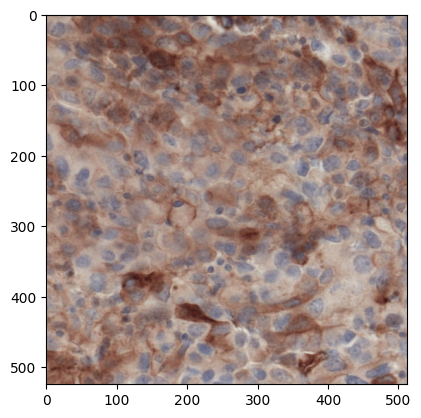

In [63]:
plt.imshow(plt.imread(image_list[0]))

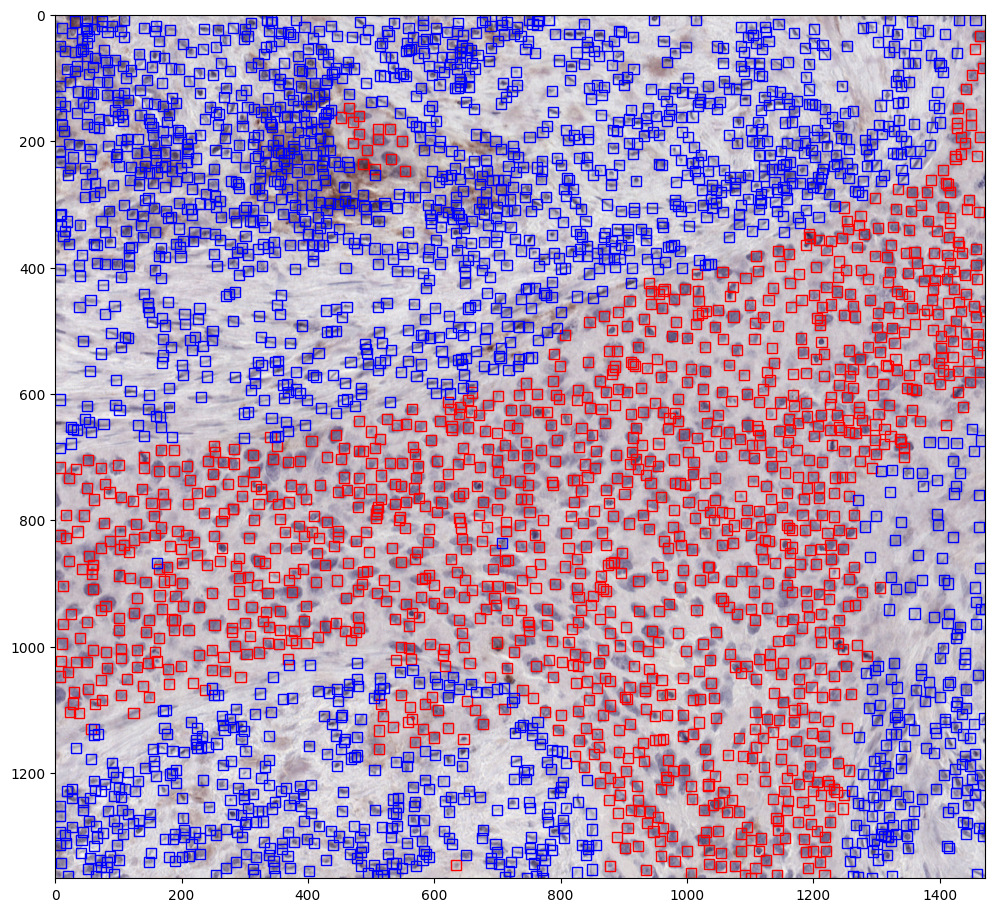

In [88]:
# 첫 번째 이미지에 대해 bounding box 시각화
image_id=10
img = plt.imread(f'../../data/IGNITE/images/pdl1/pdl1/{annotations_label[image_id]['image']['file_name']}')
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.imshow(img)
# 해당 이미지의 annotation 찾기
ann = annotations_label[image_id]['annotations']
for a in ann:
    bbox = a['bbox']  # [x, y, w, h]
    category_id = a['category_id']
    if category_id == 1:
        edgecolor = 'r'  # Red for pd-l1 negative tumor cell
    elif category_id == 2:
        edgecolor = 'g'  # Green for pd-l1 positive tumor cell
    elif category_id == 3:
        edgecolor = 'b'  # Blue for pd-l1 non-tumor cell
    rect = plt.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor=edgecolor, facecolor='none')
    ax.add_patch(rect)

plt.show()

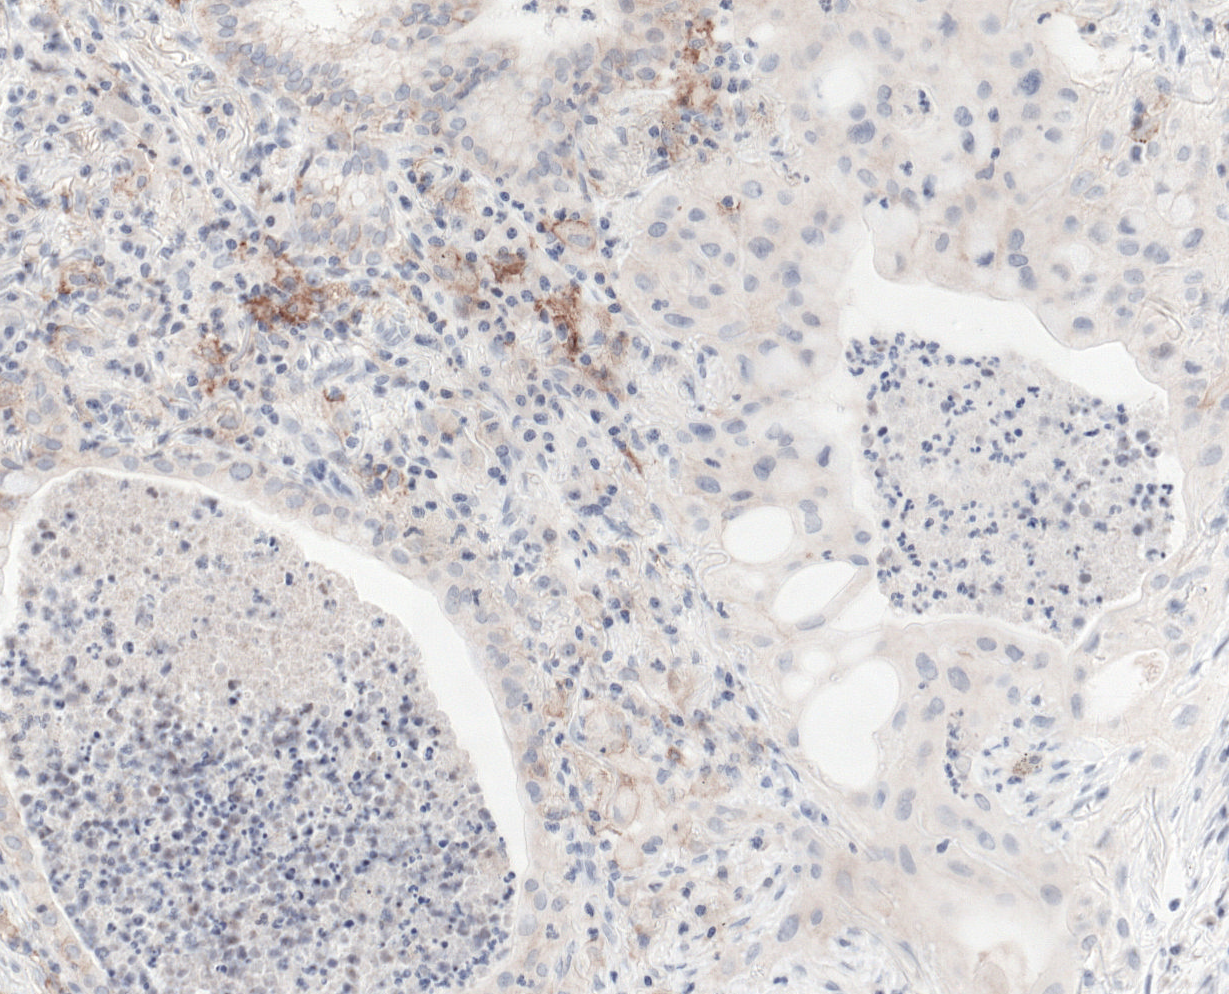

In [87]:
Image.open(f'../../data/IGNITE/images/pdl1/pdl1/{annotations_label[image_id]['image']['file_name']}')